In [1]:
import numpy as np 
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('E:\Real Estate Data V21.csv')
df.head()

,Name,Property Title,Price,Location,Total_Area,Price_per_SQFT,Description,Baths,Balcony
0,Casagrand ECR 14,"4 BHK Flat for sale in Kanathur Reddikuppam, C...",₹1.99 Cr,"Kanathur Reddikuppam, Chennai",2583,7700.0,Best 4 BHK Apartment for modern-day lifestyle ...,4,Yes
1,"Ramanathan Nagar, Pozhichalur,Chennai",10 BHK Independent House for sale in Pozhichal...,₹2.25 Cr,"Ramanathan Nagar, Pozhichalur,Chennai",7000,3210.0,Looking for a 10 BHK Independent House for sal...,6,Yes
2,DAC Prapthi,"3 BHK Flat for sale in West Tambaram, Chennai",₹1.0 Cr,"Kasthuribai Nagar, West Tambaram,Chennai",1320,7580.0,"Property for sale in Tambaram, Chennai. This 3...",3,No
3,"Naveenilaya,Chepauk, Triplicane,Chennai",7 BHK Independent House for sale in Triplicane...,₹3.33 Cr,"Naveenilaya,Chepauk, Triplicane,Chennai",4250,7840.0,Entire Building for sale with 7 units of singl...,5,Yes
4,VGN Spring Field Phase 1,"2 BHK Flat for sale in Avadi, Chennai",₹48.0 L,"Avadi, Chennai",960,5000.0,"Property for sale in Avadi, Chennai. This 2 BH...",3,Yes


In [5]:
df.columns

Index(['Name', 'Property Title', 'Price', 'Location', 'Total_Area',
       'Price_per_SQFT', 'Description', 'Baths', 'Balcony'],
      dtype='object')

In [3]:
df.shape

(14528, 9)

In [4]:
BHK = []
for i in range(0,14528):
    BHK.append(df['Property Title'][i][:2])

In [5]:
df['Bedrooms'] = BHK

In [6]:
df["Bedrooms"] = df["Bedrooms"].str.replace(".","")
df["Bedrooms"] = df["Bedrooms"].str.replace("+","")
df["Bedrooms"] = df["Bedrooms"].str.replace("St","")
df["Bedrooms"] = df["Bedrooms"].str.replace("","")

In [7]:
df["Bedrooms"].value_counts()

2     5691
1     3270
3     3132
4      990
5      438
6      296
10     200
7      143
8      132
9       78
3       44
2       30
1       30
5       24
        11
4       10
9        4
8        2
7        2
Sh       1
Name: Bedrooms, dtype: int64

In [8]:
df[df["Bedrooms"] == ""].index

Int64Index([1186, 3497, 4003, 4005, 5889, 7527, 7594, 7993, 9148, 12355,
            14487],
           dtype='int64')

In [9]:
bad_df = df.index.isin([1186, 3497, 4003, 4005, 5889, 7527, 7594, 7993, 9148, 12355,14487])
df = df[~bad_df]

In [10]:
df['Bedrooms'].value_counts()

2     5691
1     3270
3     3132
4      990
5      438
6      296
10     200
7      143
8      132
9       78
3       44
1       30
2       30
5       24
4       10
9        4
8        2
7        2
Sh       1
Name: Bedrooms, dtype: int64

In [11]:
df["Bedrooms"] = df["Bedrooms"].str.replace("Sh","1")
df["Bedrooms"] = df["Bedrooms"].str.replace("1 ","1")
df["Bedrooms"] = df["Bedrooms"].str.replace("2 ","2")
df["Bedrooms"] = df["Bedrooms"].str.replace("3 ","3")
df["Bedrooms"] = df["Bedrooms"].str.replace("4 ","4")
df["Bedrooms"] = df["Bedrooms"].str.replace("5 ","5")
df["Bedrooms"] = df["Bedrooms"].str.replace("6 ","6")
df["Bedrooms"] = df["Bedrooms"].str.replace("7 ","7")
df["Bedrooms"] = df["Bedrooms"].str.replace("8 ","8")
df["Bedrooms"] = df["Bedrooms"].str.replace("9 ","9")
df["Bedrooms"] = df["Bedrooms"].str.replace("Sh","3")

In [12]:
df['Bedrooms'].value_counts()

2     5721
1     3301
3     3176
4     1000
5      462
6      296
10     200
7      145
8      134
9       82
Name: Bedrooms, dtype: int64

In [13]:
df['Bedrooms'] = df['Bedrooms'].astype(int)

In [14]:
df['Bedrooms'] > 1

0         True
1         True
2         True
3         True
4         True
         ...  
14523     True
14524    False
14525    False
14526     True
14527    False
Name: Bedrooms, Length: 14517, dtype: bool

In [15]:
df['Bedrooms1'] = np.where(df['Bedrooms'] > 1, df['Bedrooms'].astype(str) + ' BHK',df['Bedrooms'].astype(str) + ' RK')

In [16]:
df.head()

,Name,Property Title,Price,Location,Total_Area,Price_per_SQFT,Description,Baths,Balcony,Bedrooms,Bedrooms1
0,Casagrand ECR 14,"4 BHK Flat for sale in Kanathur Reddikuppam, C...",₹1.99 Cr,"Kanathur Reddikuppam, Chennai",2583,7700.0,Best 4 BHK Apartment for modern-day lifestyle ...,4,Yes,4,4 BHK
1,"Ramanathan Nagar, Pozhichalur,Chennai",10 BHK Independent House for sale in Pozhichal...,₹2.25 Cr,"Ramanathan Nagar, Pozhichalur,Chennai",7000,3210.0,Looking for a 10 BHK Independent House for sal...,6,Yes,10,10 BHK
2,DAC Prapthi,"3 BHK Flat for sale in West Tambaram, Chennai",₹1.0 Cr,"Kasthuribai Nagar, West Tambaram,Chennai",1320,7580.0,"Property for sale in Tambaram, Chennai. This 3...",3,No,3,3 BHK
3,"Naveenilaya,Chepauk, Triplicane,Chennai",7 BHK Independent House for sale in Triplicane...,₹3.33 Cr,"Naveenilaya,Chepauk, Triplicane,Chennai",4250,7840.0,Entire Building for sale with 7 units of singl...,5,Yes,7,7 BHK
4,VGN Spring Field Phase 1,"2 BHK Flat for sale in Avadi, Chennai",₹48.0 L,"Avadi, Chennai",960,5000.0,"Property for sale in Avadi, Chennai. This 2 BH...",3,Yes,2,2 BHK


In [17]:
df["Name"].isin(df["Location"]).value_counts()

True     8883
False    5634
Name: Name, dtype: int64

In [18]:
df_split1 = df[~df["Name"].isin(df["Location"])]
df_split2 = df[df["Name"].isin(df["Location"])]

In [19]:
df_split2['Name'][1].split(',')[-2]

' Pozhichalur'

In [20]:
df_split2 = df_split2.reset_index()

In [21]:
len(df_split2)

8883

In [22]:
property_loc = []
for i in range(0,8883):
    property_loc.append(df_split2['Name'][i].split(',')[-2])

In [23]:
df_split2['Name1'] = property_loc

In [24]:
df_split2['Name1'] = 'Property in ' + df_split2['Name1'].astype(str)

In [25]:
df_split2.head(1)

,index,Name,Property Title,Price,Location,Total_Area,Price_per_SQFT,Description,Baths,Balcony,Bedrooms,Bedrooms1,Name1
0,1,"Ramanathan Nagar, Pozhichalur,Chennai",10 BHK Independent House for sale in Pozhichal...,₹2.25 Cr,"Ramanathan Nagar, Pozhichalur,Chennai",7000,3210.0,Looking for a 10 BHK Independent House for sal...,6,Yes,10,10 BHK,Property in Pozhichalur


In [26]:
df_split2.columns

df_split_Edit = df_split2[['Name1', 'Bedrooms1','Baths', 'Balcony','Price', 'Location', 'Total_Area',
       'Price_per_SQFT', 'Property Title', 'Description']]

In [27]:
df_split_Edit = df_split_Edit.rename(columns={'Name1': 'Name'})

In [28]:
df_split1_edit = df_split1[['Name', 'Bedrooms1','Baths', 'Balcony','Price', 'Location', 'Total_Area',
       'Price_per_SQFT', 'Property Title', 'Description']]
df_split1_edit.head(4)

,Name,Bedrooms1,Baths,Balcony,Price,Location,Total_Area,Price_per_SQFT,Property Title,Description
0,Casagrand ECR 14,4 BHK,4,Yes,₹1.99 Cr,"Kanathur Reddikuppam, Chennai",2583,7700.0,"4 BHK Flat for sale in Kanathur Reddikuppam, C...",Best 4 BHK Apartment for modern-day lifestyle ...
2,DAC Prapthi,3 BHK,3,No,₹1.0 Cr,"Kasthuribai Nagar, West Tambaram,Chennai",1320,7580.0,"3 BHK Flat for sale in West Tambaram, Chennai","Property for sale in Tambaram, Chennai. This 3..."
4,VGN Spring Field Phase 1,2 BHK,3,Yes,₹48.0 L,"Avadi, Chennai",960,5000.0,"2 BHK Flat for sale in Avadi, Chennai","Property for sale in Avadi, Chennai. This 2 BH..."
5,KG Earth Homes,2 BHK,3,No,₹40.0 L,"Siruseri, Chennai",940,4250.0,"2 BHK Flat for sale in Siruseri, Chennai","Price negotiable. Big hall, big balcony, gated..."


In [29]:
print(df)

                                                    Name  \
0                                       Casagrand ECR 14   
1                  Ramanathan Nagar, Pozhichalur,Chennai   
2                                            DAC Prapthi   
3                Naveenilaya,Chepauk, Triplicane,Chennai   
4                               VGN Spring Field Phase 1   
...                                                  ...   
14523      Krishna Park Extension, Tilak Nagar,New Delhi   
14524                   Rawta, Jaffarpur Kalan,New Delhi   
14525                Rani Garden, Geeta Colony,New Delhi   
14526  Lig flat rohini,Sector 16E, Sector 16 Rohini,N...   
14527               Sector 3B, Sector 3 Rohini,New Delhi   

                                          Property Title     Price  \
0      4 BHK Flat for sale in Kanathur Reddikuppam, C...  ₹1.99 Cr   
1      10 BHK Independent House for sale in Pozhichal...  ₹2.25 Cr   
2          3 BHK Flat for sale in West Tambaram, Chennai   ₹1.0 Cr   

In [30]:
df = df_split1_edit

In [31]:
df.head(4)

,Name,Bedrooms1,Baths,Balcony,Price,Location,Total_Area,Price_per_SQFT,Property Title,Description
0,Casagrand ECR 14,4 BHK,4,Yes,₹1.99 Cr,"Kanathur Reddikuppam, Chennai",2583,7700.0,"4 BHK Flat for sale in Kanathur Reddikuppam, C...",Best 4 BHK Apartment for modern-day lifestyle ...
2,DAC Prapthi,3 BHK,3,No,₹1.0 Cr,"Kasthuribai Nagar, West Tambaram,Chennai",1320,7580.0,"3 BHK Flat for sale in West Tambaram, Chennai","Property for sale in Tambaram, Chennai. This 3..."
4,VGN Spring Field Phase 1,2 BHK,3,Yes,₹48.0 L,"Avadi, Chennai",960,5000.0,"2 BHK Flat for sale in Avadi, Chennai","Property for sale in Avadi, Chennai. This 2 BH..."
5,KG Earth Homes,2 BHK,3,No,₹40.0 L,"Siruseri, Chennai",940,4250.0,"2 BHK Flat for sale in Siruseri, Chennai","Price negotiable. Big hall, big balcony, gated..."


In [32]:
again_new_data = pd.concat([df_split1_edit,df_split_Edit], ignore_index=True)
again_new_data.shape
again_new_data.head(4)

,Name,Bedrooms1,Baths,Balcony,Price,Location,Total_Area,Price_per_SQFT,Property Title,Description
0,Casagrand ECR 14,4 BHK,4,Yes,₹1.99 Cr,"Kanathur Reddikuppam, Chennai",2583,7700.0,"4 BHK Flat for sale in Kanathur Reddikuppam, C...",Best 4 BHK Apartment for modern-day lifestyle ...
1,DAC Prapthi,3 BHK,3,No,₹1.0 Cr,"Kasthuribai Nagar, West Tambaram,Chennai",1320,7580.0,"3 BHK Flat for sale in West Tambaram, Chennai","Property for sale in Tambaram, Chennai. This 3..."
2,VGN Spring Field Phase 1,2 BHK,3,Yes,₹48.0 L,"Avadi, Chennai",960,5000.0,"2 BHK Flat for sale in Avadi, Chennai","Property for sale in Avadi, Chennai. This 2 BH..."
3,KG Earth Homes,2 BHK,3,No,₹40.0 L,"Siruseri, Chennai",940,4250.0,"2 BHK Flat for sale in Siruseri, Chennai","Price negotiable. Big hall, big balcony, gated..."


In [33]:
print("No of Villa Properties are: {}".format(len(again_new_data[again_new_data['Property Title'].str.contains('Villa')])))
again_new_data[again_new_data['Property Title'].str.contains('Villa')][:4]

No of Villa Properties are: 737


,Name,Bedrooms1,Baths,Balcony,Price,Location,Total_Area,Price_per_SQFT,Property Title,Description
12,CasaGrand Vistaaz,3 BHK,3,No,₹1.08 Cr,"Kolapakkam - Vandalur, Chennai",1566,6900.0,"3 BHK Villa for sale in Kolapakkam - Vandalur,...",Close to Shriram IT Gateway and New Kilambakka...
20,Jones Dawn Villas by Jones Foundations,3 BHK,3,Yes,₹87.0 L,"Ponmar, Chennai",1782,4880.0,"3 BHK Villa for sale in Ponmar, Chennai",One of the finest property in Moolacheri is no...
61,Adityaram Nagar Phase 5,4 BHK,5,Yes,₹2.6 Cr,"Adityaram Nagar, Panaiyur,Chennai",3500,7430.0,"4 BHK Villa for sale in Panaiyur, Chennai","Looking for a good 4 BHK Villa in Panayur, Che..."
64,Pacifica Aurum Villas,4 BHK,4,Yes,₹1.4 Cr,"Padur, Chennai",2117,6610.0,"4 BHK Villa for sale in Padur, Chennai","Looking for a good 4 BHK Villa in Padur, Chenn..."


In [34]:
again_new_data['Property_Type'] = np.where(again_new_data['Property Title'].str.contains('Villa') == True, 'Villa', 
    'To Add')

In [35]:
again_new_data['Property_Type'] = np.where(again_new_data['Property Title'].str.contains('Independent House') == True , 'Independent House', 
    again_new_data['Property_Type'])

In [36]:
again_new_data['Property_Type'] = np.where(again_new_data['Property Title'].str.contains('Flat') == True , 'Flat', 
    again_new_data['Property_Type'])

In [37]:
again_new_data['Price'][1].replace('₹','').replace(' Cr','')

'1.0'

In [38]:
new_data_split = again_new_data

In [39]:
new_data_split['Price'] = new_data_split['Price'].map(lambda x: x.lstrip('₹').rstrip(' Cr'))

In [40]:
croress = new_data_split[~new_data_split['Price'].str.contains(' L')]

In [41]:
lakhs = new_data_split[new_data_split['Price'].str.contains(' L')]

In [42]:
croress['Price'] = croress['Price'].map(lambda x: x.rstrip('k'))
croress['Price'] = croress['Price'].astype(float)
croress['Price'] = croress['Price']*10000000
croress.head(2)

,Name,Bedrooms1,Baths,Balcony,Price,Location,Total_Area,Price_per_SQFT,Property Title,Description,Property_Type
0,Casagrand ECR 14,4 BHK,4,Yes,19900000.0,"Kanathur Reddikuppam, Chennai",2583,7700.0,"4 BHK Flat for sale in Kanathur Reddikuppam, C...",Best 4 BHK Apartment for modern-day lifestyle ...,Flat
1,DAC Prapthi,3 BHK,3,No,10000000.0,"Kasthuribai Nagar, West Tambaram,Chennai",1320,7580.0,"3 BHK Flat for sale in West Tambaram, Chennai","Property for sale in Tambaram, Chennai. This 3...",Flat


In [43]:
lakhs['Price'] = lakhs['Price'].map(lambda x: x.rstrip(' L'))
lakhs['Price'] = lakhs['Price'].map(lambda x: x.rstrip(' Lacs'))
lakhs['Price'] = lakhs['Price'].astype(float)
lakhs['Price'] = lakhs['Price']*100000
lakhs.head(2)

,Name,Bedrooms1,Baths,Balcony,Price,Location,Total_Area,Price_per_SQFT,Property Title,Description,Property_Type
2,VGN Spring Field Phase 1,2 BHK,3,Yes,4800000.0,"Avadi, Chennai",960,5000.0,"2 BHK Flat for sale in Avadi, Chennai","Property for sale in Avadi, Chennai. This 2 BH...",Flat
3,KG Earth Homes,2 BHK,3,No,4000000.0,"Siruseri, Chennai",940,4250.0,"2 BHK Flat for sale in Siruseri, Chennai","Price negotiable. Big hall, big balcony, gated...",Flat


In [44]:
again_new_data_mega = pd.concat([croress, lakhs], ignore_index=True)
again_new_data_mega.head()

,Name,Bedrooms1,Baths,Balcony,Price,Location,Total_Area,Price_per_SQFT,Property Title,Description,Property_Type
0,Casagrand ECR 14,4 BHK,4,Yes,19900000.0,"Kanathur Reddikuppam, Chennai",2583,7700.0,"4 BHK Flat for sale in Kanathur Reddikuppam, C...",Best 4 BHK Apartment for modern-day lifestyle ...,Flat
1,DAC Prapthi,3 BHK,3,No,10000000.0,"Kasthuribai Nagar, West Tambaram,Chennai",1320,7580.0,"3 BHK Flat for sale in West Tambaram, Chennai","Property for sale in Tambaram, Chennai. This 3...",Flat
2,DRA 90 Degrees,3 BHK,3,No,13000000.0,"Rose Avenue, Pallikaranai,Chennai",1444,9000.0,"3 BHK Flat for sale in Pallikaranai, Chennai",Looking for a 3 BHK Apartment for sale in Chen...,Flat
3,Ramcons Dominion,3 BHK,3,Yes,26000000.0,"Tirumurthy Nagar, Nungambakkam,Chennai",1658,15680.0,"3 BHK Flat for sale in Nungambakkam, Chennai",Best 3 BHK Apartment for modern-day lifestyle ...,Flat
4,VGN Coasta,4 BHK,5,Yes,29700000.0,"Muttukadu, Chennai",4200,7070.0,"4 BHK Flat for sale in Muttukadu, Chennai",Best 4 BHK Apartment for modern-day lifestyle ...,Flat


In [45]:
again_new_data_mega['Location'][i].split(',')[-1]

' Chennai'

In [46]:
lococity = []
for i in range(0,14517):
    lococity.append(again_new_data_mega['Location'][i].split(',')[-1].replace(' Bangalore','Bangalore').replace(' Pune','Pune').replace(' Chennai','Chennai').replace(' New Delhi','New Delhi').replace(' Hyderabad','Hyderabad').replace(' Mumbai','Mumbai').replace(' Kolkata','Kolkata'))

In [47]:
again_new_data_mega['City'] = lococity

In [48]:
again_new_data_mega['City'].value_counts()

Bangalore    4509
Pune         2963
New Delhi    2164
Chennai      1594
Kolkata      1391
Mumbai       1350
Hyderabad     540
Thane           6
Name: City, dtype: int64

In [49]:
again_new_data_mega.columns

Index(['Name', 'Bedrooms1', 'Baths', 'Balcony', 'Price', 'Location',
       'Total_Area', 'Price_per_SQFT', 'Property Title', 'Description',
       'Property_Type', 'City'],
      dtype='object')

In [50]:
again_new_data_mega1 = again_new_data_mega[['Name','Property_Type', 'Bedrooms1', 'Baths', 'Balcony',  'City' , 'Location',
       'Total_Area', 'Price_per_SQFT', 'Price', 'Property Title', 'Description']]

In [51]:
again_new_data_mega1.head(3)

,Name,Property_Type,Bedrooms1,Baths,Balcony,City,Location,Total_Area,Price_per_SQFT,Price,Property Title,Description
0,Casagrand ECR 14,Flat,4 BHK,4,Yes,Chennai,"Kanathur Reddikuppam, Chennai",2583,7700.0,19900000.0,"4 BHK Flat for sale in Kanathur Reddikuppam, C...",Best 4 BHK Apartment for modern-day lifestyle ...
1,DAC Prapthi,Flat,3 BHK,3,No,Chennai,"Kasthuribai Nagar, West Tambaram,Chennai",1320,7580.0,10000000.0,"3 BHK Flat for sale in West Tambaram, Chennai","Property for sale in Tambaram, Chennai. This 3..."
2,DRA 90 Degrees,Flat,3 BHK,3,No,Chennai,"Rose Avenue, Pallikaranai,Chennai",1444,9000.0,13000000.0,"3 BHK Flat for sale in Pallikaranai, Chennai",Looking for a 3 BHK Apartment for sale in Chen...


In [52]:
print("No of rows to iterate:{}".format(len(again_new_data_mega1)))

No of rows to iterate:14517


In [53]:
descrip = []
for i in range(0,14517):
    descrip.append(again_new_data_mega1['Description'][i].split('.')[:-4])

In [54]:
descriptiv = []
for i in range(0,14517):
    descriptiv.append('.'.join(descrip[i]))
    
print("Difference can be seen below")
print("Before")
display(descrip[0])
print('-'*50)
print(' '*50)
print('-'*50)
print("After")
display(descriptiv[0])

Difference can be seen below
Before


['Best 4 BHK Apartment for modern-day lifestyle is now available for sale',
 ' No brokerage involved, Posted by Owner',
 " Grab this 4 BHK property for sale in one of Chennai's top location, Kanathur Reddikuppam",
 ' It is situated on floor 13',
 ' The total number of floors in this Apartment is 14',
 ' The property price of this unit is Rs 1',
 '99 Cr',
 ' The built-up area is 2583 Square feet',
 ' There are 4 bedrooms and 4 bathroom',
 ' It is an ideal location for young families with kids, as this property is close to Mount Litera Zee School, OMR, Chennai, Amelio Early Education - Siruseri, and Chennai Mathematical Institute']

--------------------------------------------------
                                                  
--------------------------------------------------
After


"Best 4 BHK Apartment for modern-day lifestyle is now available for sale. No brokerage involved, Posted by Owner. Grab this 4 BHK property for sale in one of Chennai's top location, Kanathur Reddikuppam. It is situated on floor 13. The total number of floors in this Apartment is 14. The property price of this unit is Rs 1.99 Cr. The built-up area is 2583 Square feet. There are 4 bedrooms and 4 bathroom. It is an ideal location for young families with kids, as this property is close to Mount Litera Zee School, OMR, Chennai, Amelio Early Education - Siruseri, and Chennai Mathematical Institute"

In [55]:
print(df.describe())

             Baths    Total_Area  Price_per_SQFT
count  5634.000000   5634.000000     5634.000000
mean      2.704473   1110.386049     8908.645722
std       0.721084    755.152692    24302.846969
min       1.000000    100.000000        0.000000
25%       2.000000    690.000000     4640.000000
50%       3.000000   1000.000000     6020.000000
75%       3.000000   1285.000000     8577.500000
max       6.000000  15000.000000   952000.000000


In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
df['Price'] = df['Price'].str.replace('[^\d.]', '', regex=True).astype(float)

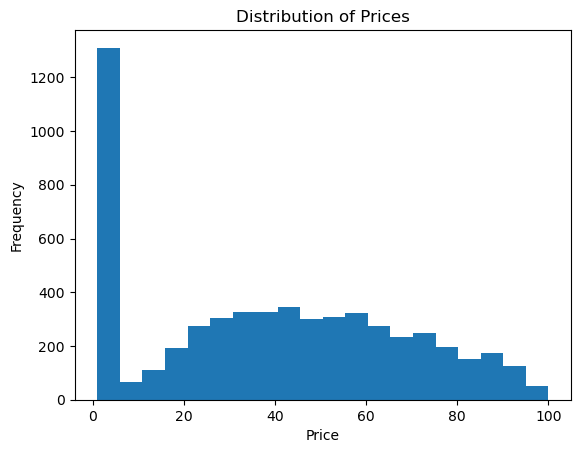

In [58]:
plt.hist(df['Price'], bins=20)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Prices')
plt.show()

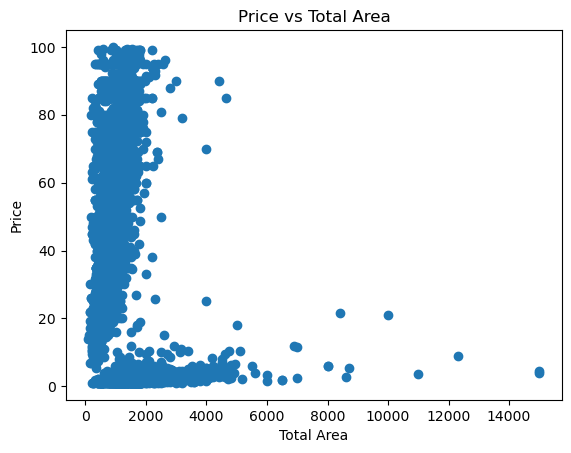

In [60]:
plt.scatter(df['Total_Area'], df['Price'])
plt.xlabel('Total Area')
plt.ylabel('Price')
plt.title('Price vs Total Area')
plt.show()

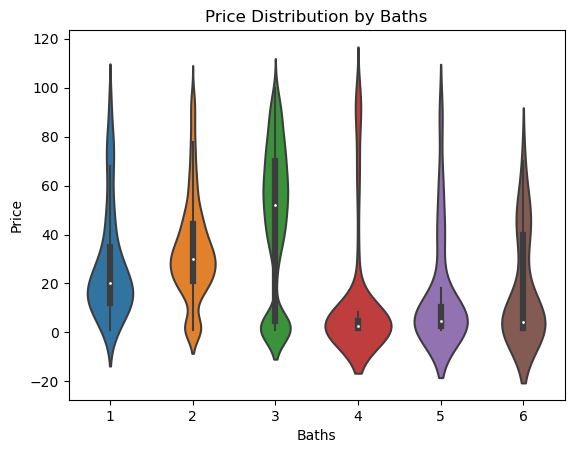

In [61]:
sns.violinplot(x='Baths', y='Price', data=df)
plt.xlabel('Baths')
plt.ylabel('Price')
plt.title('Price Distribution by Baths')
plt.show()

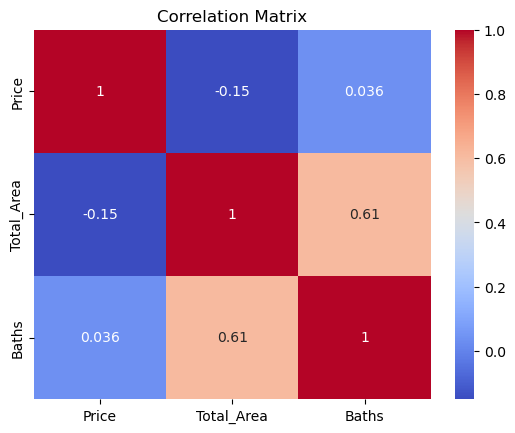

In [62]:
correlation_matrix = df[['Price', 'Total_Area', 'Baths']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

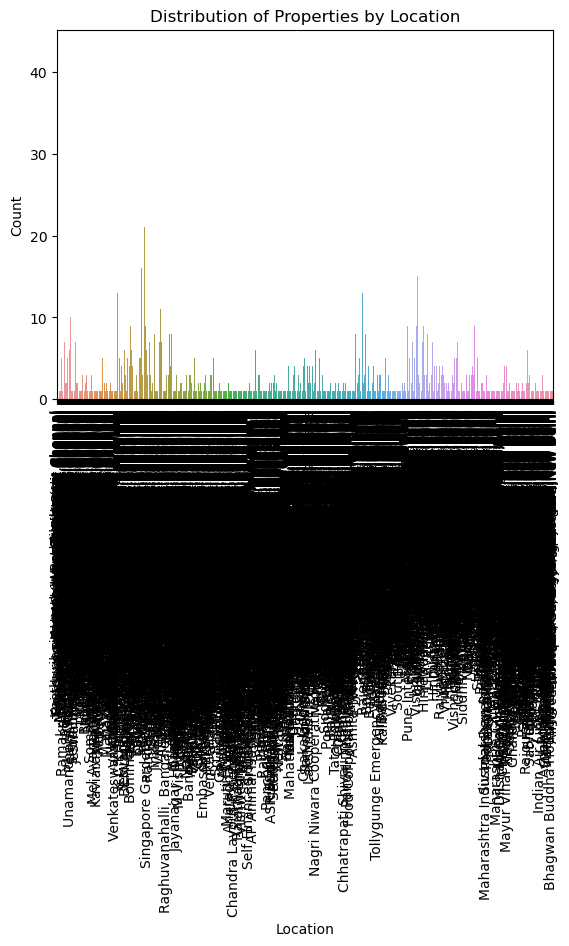

In [63]:
sns.countplot(x='Location', data=df)
plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Distribution of Properties by Location')
plt.xticks(rotation=90)
plt.show()

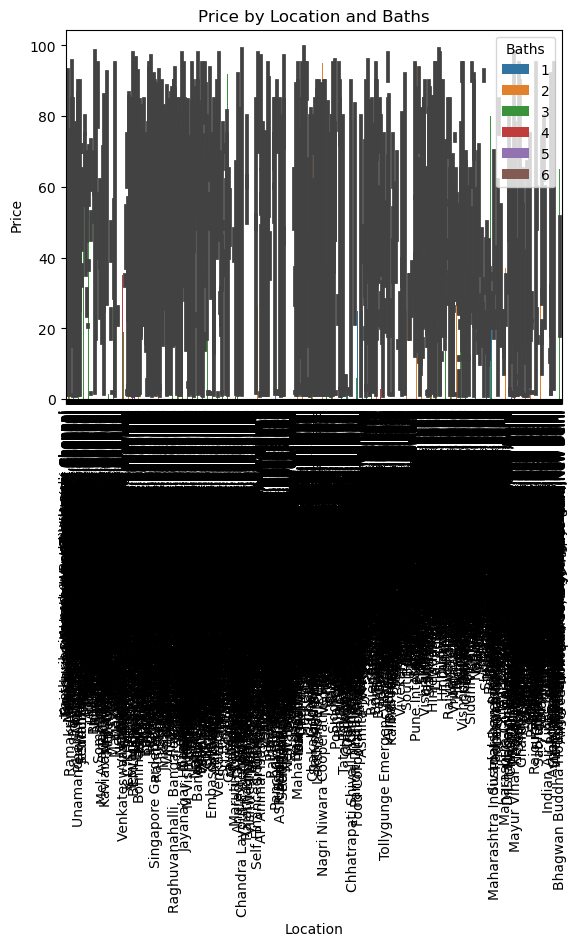

In [64]:
sns.barplot(x='Location', y='Price', hue='Baths', data=df)
plt.xlabel('Location')
plt.ylabel('Price')
plt.title('Price by Location and Baths')
plt.xticks(rotation=90)
plt.legend(title='Baths')
plt.show()

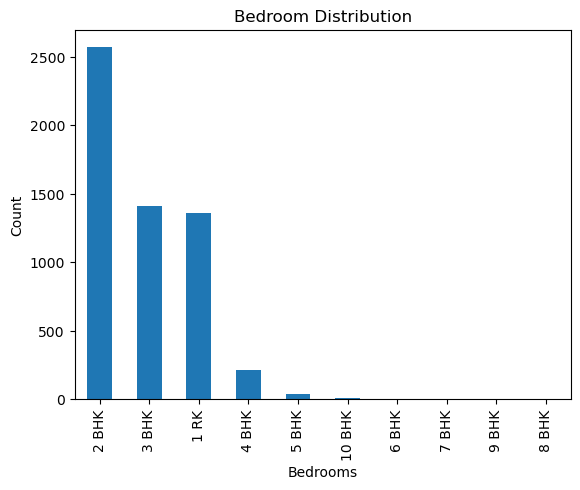

In [65]:
bedroom_counts = df['Bedrooms1'].value_counts()
bedroom_counts.plot(kind='bar', stacked=True)
plt.xlabel('Bedrooms')
plt.ylabel('Count')
plt.title('Bedroom Distribution')
plt.show()

In [66]:
average_price_by_location = df.groupby('Location')['Price'].mean()
median_price_by_bedrooms = df.groupby('Bedrooms1')['Price'].median()

In [67]:
filtered_df = df[df['Price'] > 1000000]

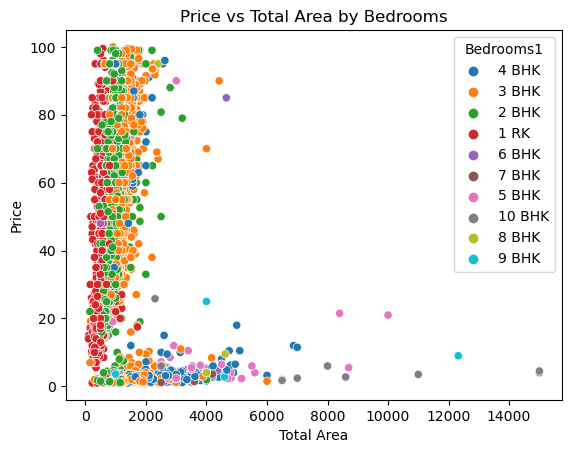

In [68]:
sns.scatterplot(x='Total_Area', y='Price', hue='Bedrooms1', data=df)
plt.xlabel('Total Area')
plt.ylabel('Price')
plt.title('Price vs Total Area by Bedrooms')
plt.show()

In [70]:
df.to_csv('modified_data.csv')